                                           INVENTORY OPTIMIZATION ON WALMART STORE SALES DATASET

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

Importing dataset

In [5]:
features=pd.read_csv(r"D:\Wall Mart dataset\features.csv")
train=pd.read_csv(r"D:\Wall Mart dataset\train.csv")
test=pd.read_csv(r"D:\Wall Mart dataset\test.csv")
sampleSubmission=pd.read_csv(r"D:\Wall Mart dataset\sampleSubmission.csv")
stores=pd.read_csv(r"D:\Wall Mart dataset\stores.csv")

In [6]:
features=features.drop(columns=["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"])

In [7]:
features.head(2)

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True


In [8]:
features.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [14]:
train.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True


In [16]:
train.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [18]:
stores.head(2)

,Store,Type,Size
0,1,A,151315
1,2,A,202307


In [20]:
stores.columns

Index(['Store', 'Type', 'Size'], dtype='object')

In [22]:
merged_df = train.merge(features, on=['Store', 'Date'], how='left')

In [24]:
merged_df["IsHoliday"]=merged_df["IsHoliday_y"]
merged_df=merged_df.drop(columns=["IsHoliday_y","IsHoliday_x"])

In [26]:
merged_df.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,1,2010-02-05,24924.50,42.31,2.572,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,38.51,2.548,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,39.93,2.514,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,46.63,2.561,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,46.50,2.625,211.350143,8.106,False


In [28]:
data=merged_df.merge(stores,on=["Store"],how="left")

Preprocessed Dataset

In [31]:
data.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,42.31,2.572,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,38.51,2.548,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,39.93,2.514,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,46.63,2.561,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,46.50,2.625,211.350143,8.106,False,A,151315


In [33]:
data.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
IsHoliday       0
Type            0
Size            0
dtype: int64

In [35]:
data.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,227.232807,14.313000,219622.000000


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   Temperature   421570 non-null  float64
 5   Fuel_Price    421570 non-null  float64
 6   CPI           421570 non-null  float64
 7   Unemployment  421570 non-null  float64
 8   IsHoliday     421570 non-null  bool   
 9   Type          421570 non-null  object 
 10  Size          421570 non-null  int64  
dtypes: bool(1), float64(5), int64(3), object(2)
memory usage: 32.6+ MB


Key Metrics for Analysis
1.Sales Forecasting
2.Stock Level Optimization
3.Store Performance Comparison

In [47]:
data['Date'] = pd.to_datetime(data['Date'])
sales_trend = data.groupby('Date')['Weekly_Sales'].sum()

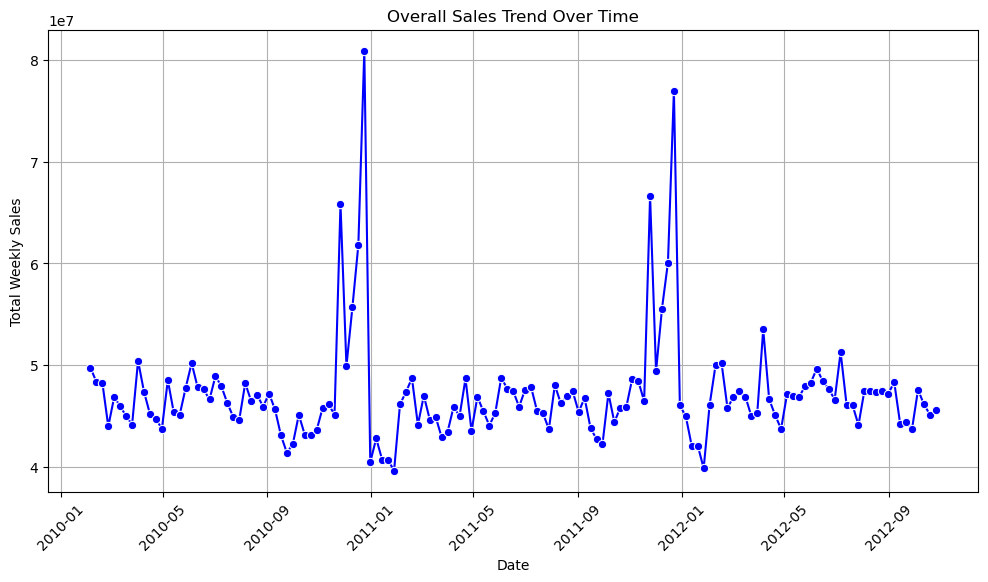

In [49]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=sales_trend.index, y=sales_trend.values, marker="o", color="blue")
plt.title("Overall Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Weekly Sales")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [53]:
 ##impact of holidays on sales.
holiday_sales = data.groupby("IsHoliday")["Weekly_Sales"].mean()

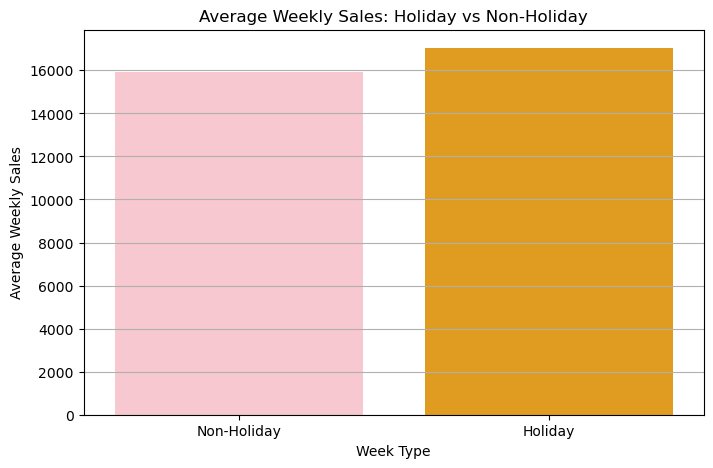

In [94]:
plt.figure(figsize=(8, 5))
plt.grid()
sns.barplot(x=holiday_sales.index, y=holiday_sales.values, palette=["pink", "orange"])
plt.xticks([0, 1], ["Non-Holiday", "Holiday"])
plt.title("Average Weekly Sales: Holiday vs Non-Holiday")
plt.xlabel("Week Type")
plt.ylabel("Average Weekly Sales")
plt.show()

In [65]:
#the effect of economic indicators (CPI, Fuel Price, Unemployment) on sales
corr_matrix = data[['Weekly_Sales', 'CPI', 'Fuel_Price', 'Unemployment']].corr()


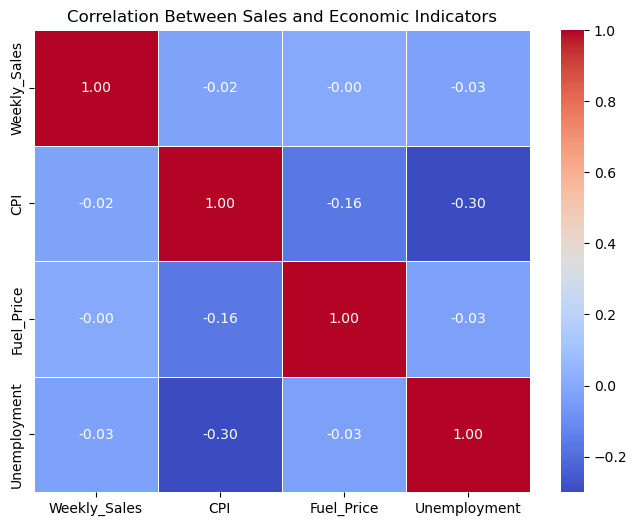

In [67]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Sales and Economic Indicators")
plt.show()

In [69]:
#stock level optimization by identifying high-demand and low-demand stores and departments
store_sales = data.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending=False)
dept_sales = data.groupby("Dept")["Weekly_Sales"].sum().sort_values(ascending=False)

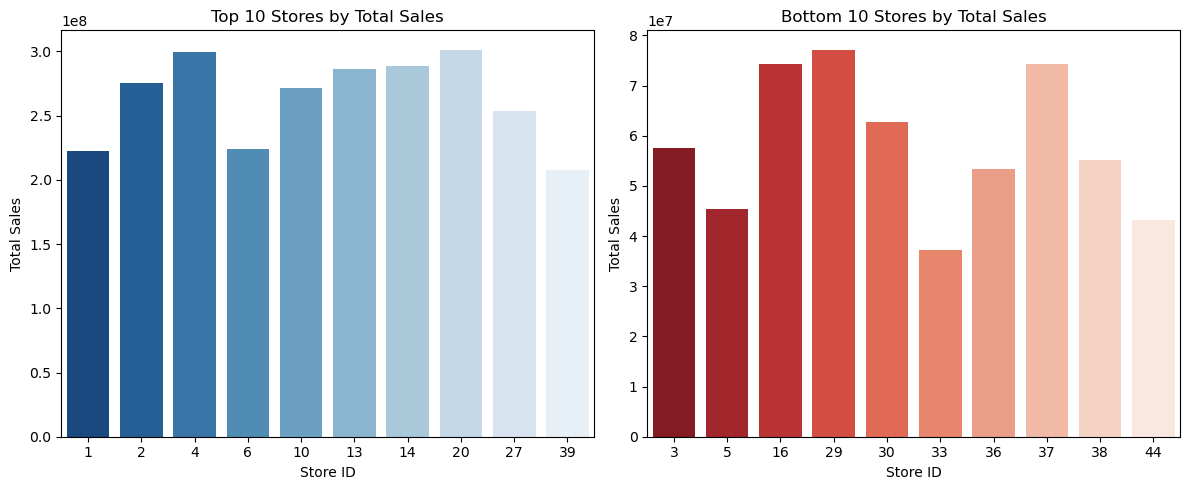

In [96]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=store_sales.head(10).index, y=store_sales.head(10).values, palette="Blues_r")
plt.title("Top 10 Stores by Total Sales")
plt.xlabel("Store ID")
plt.ylabel("Total Sales")

plt.subplot(1, 2, 2)
sns.barplot(x=store_sales.tail(10).index, y=store_sales.tail(10).values, palette="Reds_r")
plt.title("Bottom 10 Stores by Total Sales")
plt.xlabel("Store ID")
plt.ylabel("Total Sales")

plt.tight_layout()
plt.show()

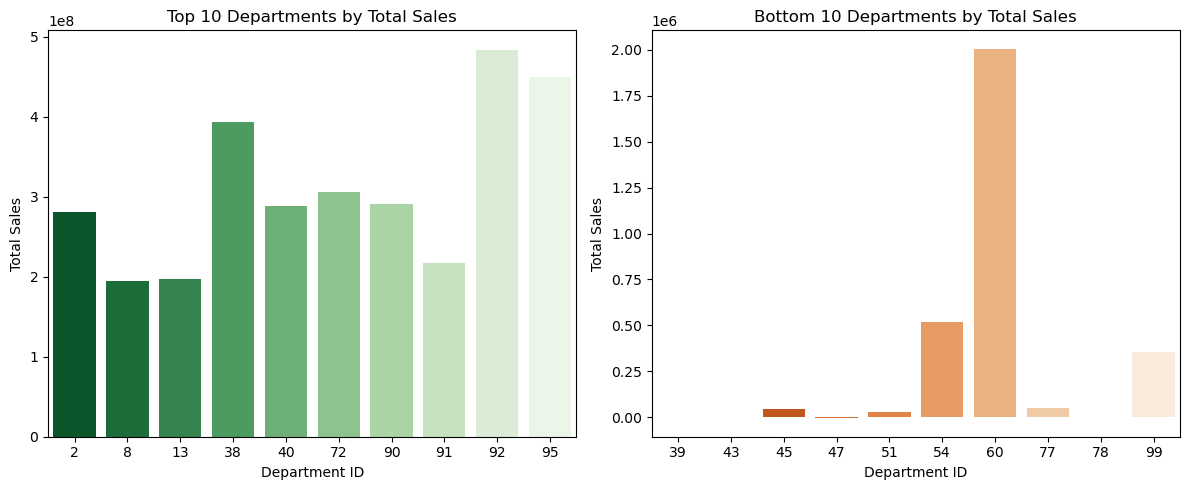

In [98]:
#department-wise sales trends.
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=dept_sales.head(10).index, y=dept_sales.head(10).values, palette="Greens_r")
plt.title("Top 10 Departments by Total Sales")
plt.xlabel("Department ID")
plt.ylabel("Total Sales")

plt.subplot(1, 2, 2)
sns.barplot(x=dept_sales.tail(10).index, y=dept_sales.tail(10).values, palette="Oranges_r")
plt.title("Bottom 10 Departments by Total Sales")
plt.xlabel("Department ID")
plt.ylabel("Total Sales")

plt.tight_layout()
plt.show()

In [100]:
#performance based on store type (A, B, C) and size.
store_type_sales = data.groupby("Type")["Weekly_Sales"].mean().sort_values()

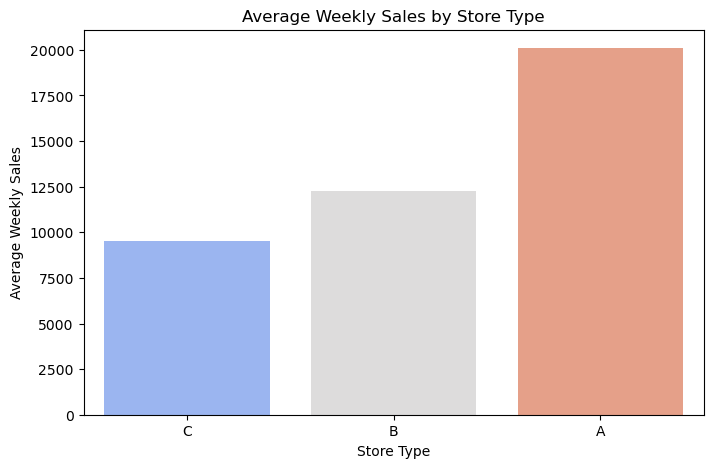

In [104]:
plt.figure(figsize=(8, 5))
sns.barplot(x=store_type_sales.index, y=store_type_sales.values, palette="coolwarm")
plt.title("Average Weekly Sales by Store Type")
plt.xlabel("Store Type")
plt.ylabel("Average Weekly Sales")
plt.show()

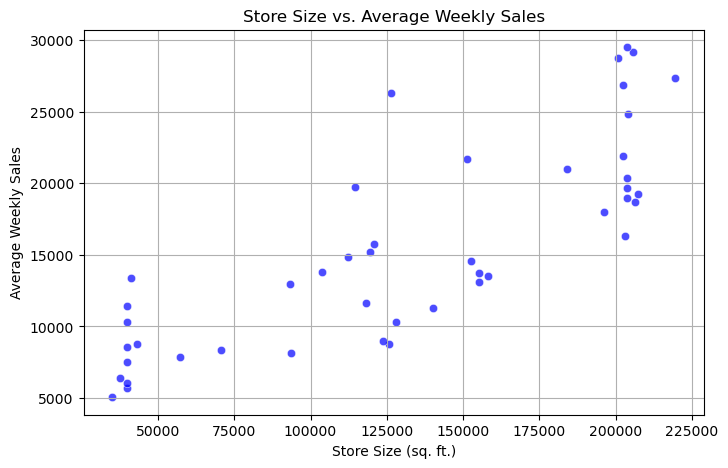

In [108]:
#impact of store size on sales
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data.groupby("Store")["Size"].mean(), y=data.groupby("Store")["Weekly_Sales"].mean(), color="blue", alpha=0.7)
plt.title("Store Size vs. Average Weekly Sales")
plt.xlabel("Store Size (sq. ft.)")
plt.ylabel("Average Weekly Sales")
plt.grid(True)
plt.show()